In [128]:
Pkg.add("Convex")
Pkg.add("ECOS")


INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of Convex
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of ECOS
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Updating METADATA...
INFO: Updating cache of Plotly...
INFO: Updating cache of ColorTypes...
INFO: Updating cache of Lazy...
INFO: Updating cache of Requires...
INFO: Updating cache of Gadfly...
INFO: Updating cache of Blink...
INFO: Updating cache of FixedSizeArrays...
INFO: Updating cache of StatsBase...
INFO: Updating cache of DataFrames...
INFO: Updating cache of Distributions...
INFO: Updating cache of FixedPointNumbers...
INFO: Updating cache of FileIO...
INFO: Updating cache of Mux...
INFO: Updating cache of JSON...
INFO: Updating cache of Colors...
INFO: Updating cache of HttpServer...
INFO: Updating cache of Requests...
INFO: Updating 

In [ ]:
Pkg.update()

In [152]:
using Convex
using PyPlot
using ECOS
set_default_solver(ECOSSolver(verbose=0))

ECOS.ECOSSolver(Any[(:verbose,0)])

In [166]:
function generate_data(n, w)
    X = randn(n,length(w))
    y = X*w
    return X, y
end

function generate_noisy_data(n, w)
    X = randn(n,length(w))
    y = X*w + .1*randn(n)
    return X, y
end
@show randn(n)
@show n
@show size(X)
@show size(y)


randn(n) = [-0.2674418552816552,0.21976690948048452,-0.5707815122947908,-0.4053810850986928,1.1988459770823507,-1.796159086070077,-1.4150120662935863,1.2226405000984626,0.8000829187858357,1.1585529159206327,0.2039720312873244,0.467947940080279,-1.1100947130036858,-0.610353613916697,-0.8555477004945993,0.2867378854385509,1.0349781080481595,0.16752862478342054,-2.2576033509546147,-0.2683558771195283]
n = 20
size(X) = (20,10)
size(y) = (20,)


(20,)

# ols is invariant

In [165]:
d = 10
n = 20
w = randn(d)
X, y = generate_data(n, w);

In [140]:
w = X\y
@show X*w
@show w

yscale = 5*y
Xscale = 3*X
wscale = Xscale\yscale
@show Xscale*wscale / 5;
#@show wscale
@show wscale*(3/5)

X * w = [-4.920537852223303,-1.849787999634643,-4.687732903363984,-6.569887546643695,-6.330300662277171,-3.3981023328226843,-0.26055475747996804,2.0906668728746753,-2.8261876191097732,1.2419383047530081,-2.8723932662711738,-0.26119747599108845,0.5427120220310854,-2.9506341751814267,-4.46094653605687,-0.9585174375369989,-4.189446945334437,-8.063517623667853,-4.581823828852541,2.5037405990633417]
w = [1.142319780618714,1.4355271972874566,-0.09245711786282043,-1.3911020273253032,-0.7124818938962878,0.6207237137798157,-0.243505269499873,1.070181050604552,1.8653323268127089,2.008151271248275]
(Xscale * wscale) / 5 = [-4.920537852223302,-1.8497879996346414,-4.687732903363984,-6.5698875466436935,-6.330300662277169,-3.398102332822684,-0.2605547574799708,2.0906668728746745,-2.8261876191097732,1.2419383047530084,-2.8723932662711738,-0.2611974759910879,0.5427120220310847,-2.9506341751814285,-4.460946536056871,-0.9585174375369967,-4.189446945334436,-8.063517623667853,-4.581823828852543,2.503740599

10-element Array{Float64,1}:
  1.14232  
  1.43553  
 -0.0924571
 -1.3911   
 -0.712482 
  0.620724 
 -0.243505 
  1.07018  
  1.86533  
  2.00815  

# ridge regression is not scaling invariant

In [141]:
size(X'*X + eye(d))

(10,10)

In [142]:
w = (X'*X + eye(d)) \ (X'*y)
@show X*w

yscale = 5*y
Xscale = 3*X
wscale = (Xscale'*Xscale + eye(d)) \ (Xscale'*yscale)
@show Xscale * wscale / 5;

X * w = [-4.640623384723433,-1.584552977817967,-4.5353221393124565,-6.211843485935039,-6.058474348211654,-3.246205656620166,-0.27071512780425144,1.999654047276711,-2.7527655849106516,1.2431766096113268,-2.8375153768643058,-0.1422469518295424,0.3536132718881647,-2.547669361431076,-4.224717679988144,-1.0234144398874074,-3.9987481820161657,-7.781959396970799,-4.433844044841539,2.394261661658856]
(Xscale * wscale) / 5 = [-4.888155379406973,-1.8139801264254252,-4.6710527756312885,-6.526327998997486,-6.297865763064179,-3.3808681483252156,-0.2639904475704302,2.0804453207635962,-2.817851946558173,1.2434174269380815,-2.8699159877418112,-0.24448509085186565,0.517259791964044,-2.901776041103626,-4.433444999772762,-0.9671665159791493,-4.16472684955114,-8.031046700282625,-4.566808051890162,2.4912810854873166]


In [143]:
# standardize
function standardize(X,y)
    X_standard = X .- mean(X,1) 
    # If dim = 1, then mean(A,1) returns a row vector containing the mean of the elements in each column.
    # If dim = 2, then mean(A,2) returns a column vector containing the mean of the elements in each row.
#Dimension dim indicates the dimension whose length reduces to 1. The size(M,dim) is 1, while the sizes of all other dimensions remain the same.

    X_standard = X_standard * diagm(1./vec(std(X,1))) # diagm is to convert it into 10 columns
   # @show size(std(X,1)) # 1 row by 10 cols
   # @show diagm(1./vec(std(X,1)))
    y_standard = y - mean(y)
    y_standard = y_standard / std(y)
    
    return X_standard, y_standard
end

Xs, ys = standardize(X,y)
w = (Xs'*Xs + eye(d)) \ (Xs'*ys) # can't do Xs\ys cuz this doesn't do regularisation

@show Xs*w

yscale = 5*y + 3000
Xscale = 3*X + 200

Xss, yss = standardize(Xscale,yscale)
wscale = (Xss'*Xss + eye(d)) \ (Xss'*yss)
@show Xss*wscale/5;

Xs * w = [-0.6579158100181474,0.2121920963875472,-0.7159421936606525,-1.2634159632333561,-1.271481722761112,-0.24564101863586368,0.8536782602093157,1.5007739171389196,-0.09311388251985808,1.2274948298544395,-0.1291209636406833,0.8525707615965546,0.972568637418192,-0.011927070092437986,-0.5863229280888586,0.4521825338200773,-0.523920543847708,-1.6160178199087405,-0.5291469693021973,1.5725058492845694]
(Xss * wscale) / 5 = [-0.13158316200363127,0.042438419277509645,-0.14318843873212994,-0.25268319264667355,-0.2542963445522248,-0.049128203727173914,0.17073565204186175,0.3001547834277819,-0.018622776503972815,0.24549896597088638,-0.025824192728136675,0.17051415231931036,0.19451372748363785,-0.002385414018487836,-0.11726458561777076,0.09043650676401328,-0.10478410876954439,-0.3232035639817483,-0.10582939386043869,0.3145011698569137]


# let's compare different kinds of regularized regression

In [153]:
function ridge_regression(X,y; λ=1)
    d = size(X,2)
    w = Variable(d)
    p = minimize(sumsquares(X*w - y) + λ*sumsquares(w))
    solve!(p)
    return w.value
end

ridge_regression (generic function with 1 method)

In [154]:
function lasso(X,y; λ=1)
    d = size(X,2)
    w = Variable(d)
    p = minimize(sumsquares(X*w - y) + λ*norm(w,1))
    solve!(p)
    return w.value
end

lasso (generic function with 1 method)

In [155]:
function nnls(X,y)
    d = size(X,2)
    w = Variable(d)
    p = minimize(sumsquares(X*w - y), w>=0) # add constraint
    solve!(p)
    return w.value
end

nnls (generic function with 1 method)

In [147]:

Pkg.add("SparseVectors")
using sparsevectors

INFO: Nothing to be done
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in include at boot.jl:261
 in include_from_node1 at loading.jl:320
 in include at boot.jl:261
 in include_from_node1 at loading.jl:320
 in require at loading.jl:259
 in include_string at loading.jl:282
 in execute_request at C:\Users\User\.julia\v0.4\IJulia\src\execute_request.jl:169
 in eventloop at C:\Users\User\.julia\v0.4\IJulia\src\eventloop.jl:8
 in anonymous at task.jl:447
while loading C:\Users\User\.julia\v0.4\sparsevectors\src\common.jl, in expression starting on line 38
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in include at boot.jl:261
 in include_from_node1 at loading.jl:320
 in include at boot.jl:261
 in include_from_node1 at loading.jl:320
 in require at loading.jl:259
 in include_string at loading.jl:282
 in execute_request at C:\Users\User\.julia\v0.4\IJulia\src\execute_request.jl:169
 in eventloop at C:\Users\User\.julia\v0.4\IJulia\src\eventloop.jl:8
 in anonymo

In [157]:
# generate data

d = 30
srand(2)
w_randn = randn(d)
w_sparse = sprandn(d, .5) # sparse matrix, where prob of any element being non zero is p
w_pos = sprand(d, .5); # uniform distribution (default): [0,1)

# @show w_sparse # other elements not shown are zero
# @show w_pos # other elements not shown are zero

Sparse vector, length = 30, with 18 Float64 entries:
  [1 ]  =  0.381801
  [2 ]  =  0.899859
  [3 ]  =  0.0672993
  [5 ]  =  0.333567
  [6 ]  =  0.725721
  [8 ]  =  0.106167
  [13]  =  0.277165
  [14]  =  0.744682
  [15]  =  0.188051
  [19]  =  0.0023932
  [20]  =  0.870488
  [21]  =  0.975672
  [22]  =  0.778748
  [23]  =  0.228469
  [24]  =  0.55109
  [26]  =  0.256467
  [27]  =  0.14764
  [28]  =  0.824637


In [158]:
# find best model for each type of data
w = w_pos

X,y = generate_data(30, w)
w_ridge = ridge_regression(X,y)
w_lasso = lasso(X,y; λ=1)
w_nonneg = nnls(X,y);

LoadError: LoadError: UndefVarError: minimize not defined
while loading In[158], in expression starting on line 5

In [94]:
plt[:hist](w_ridge)

LoadError: LoadError: UndefVarError: plt not defined
while loading In[94], in expression starting on line 1

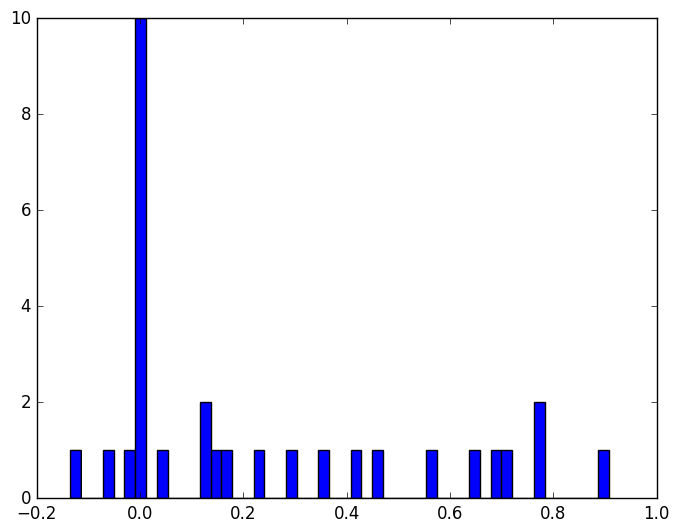

([1.0,0.0,0.0,1.0,0.0,1.0,10.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0],[-0.134716,-0.113863,-0.0930104,-0.0721579,-0.0513053,-0.0304527,-0.00960008,0.0112525,0.0321051,0.0529577,0.0738103,0.0946629,0.115515,0.136368,0.157221,0.178073,0.198926,0.219778,0.240631,0.261484,0.282336,0.303189,0.324041,0.344894,0.365747,0.386599,0.407452,0.428304,0.449157,0.47001,0.490862,0.511715,0.532567,0.55342,0.574272,0.595125,0.615978,0.63683,0.657683,0.678535,0.699388,0.720241,0.741093,0.761946,0.782798,0.803651,0.824504,0.845356,0.866209,0.887061,0.907914],Any[PyObject <matplotlib.patches.Rectangle object at 0x334376510>,PyObject <matplotlib.patches.Rectangle object at 0x334376b90>,PyObject <matplotlib.patches.Rectangle object at 0x334383250>,PyObject <matplotlib.patches.Rectangle object at 0x3343838d0>,PyObject <matplotlib.patches.Rectangle object at 0x334383f50>,PyObje

In [125]:
plt[:hist](w_lasso, bins=50)

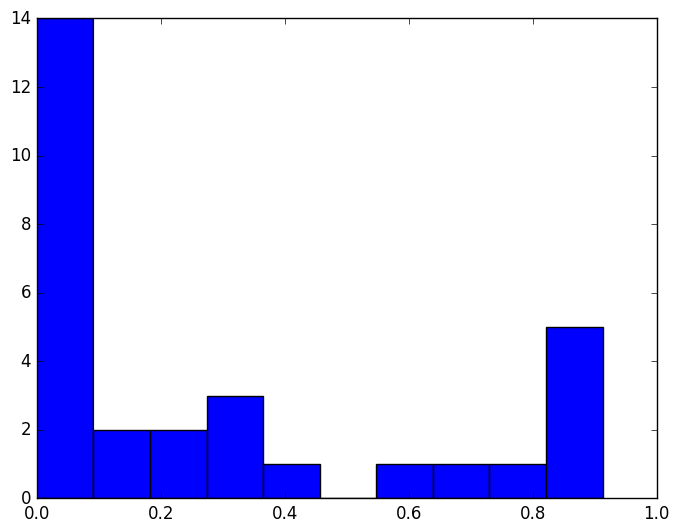

([14.0,2.0,2.0,3.0,1.0,0.0,1.0,1.0,1.0,5.0],[4.34602e-7,0.0912492,0.182498,0.273747,0.364995,0.456244,0.547493,0.638742,0.72999,0.821239,0.912488],Any[PyObject <matplotlib.patches.Rectangle object at 0x33469ced0>,PyObject <matplotlib.patches.Rectangle object at 0x3346a8590>,PyObject <matplotlib.patches.Rectangle object at 0x3346a8c10>,PyObject <matplotlib.patches.Rectangle object at 0x3346b72d0>,PyObject <matplotlib.patches.Rectangle object at 0x3346b7950>,PyObject <matplotlib.patches.Rectangle object at 0x3346b7fd0>,PyObject <matplotlib.patches.Rectangle object at 0x3346c4690>,PyObject <matplotlib.patches.Rectangle object at 0x3346c4d10>,PyObject <matplotlib.patches.Rectangle object at 0x3346d03d0>,PyObject <matplotlib.patches.Rectangle object at 0x3346d0a50>])

In [126]:
plt[:hist](w_nonneg)

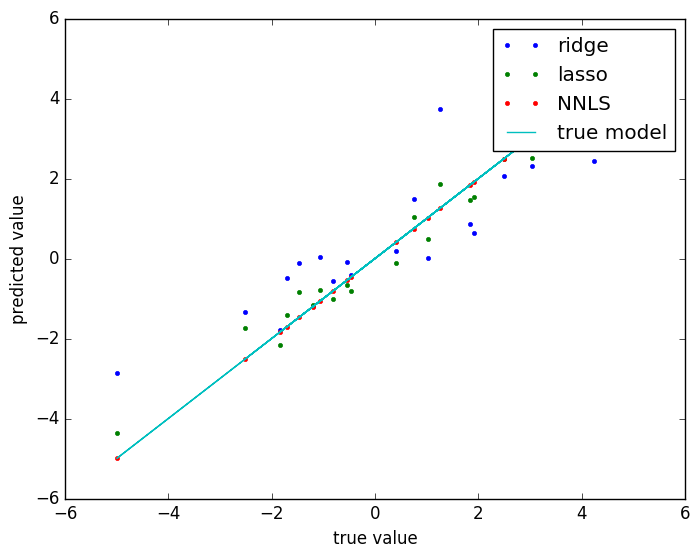

PyObject <matplotlib.text.Text object at 0x33472ab10>

In [127]:
# which fits data best?
Xtest,ytest = generate_data(20,w)

plot(ytest,Xtest*w_ridge,label="ridge",".")
plot(ytest,Xtest*w_lasso,label="lasso",".")
plot(ytest,Xtest*w_nonneg,label="NNLS",".")
plot(ytest,ytest,label="true model")
legend()
xlabel("true value")
ylabel("predicted value")

#NNLS fits best, followed by lasso. cuz w = w_pos (sparse and non neg)

In [151]:
# cross validate over lambda

w = .5*randn(40)
X,y = generate_noisy_data(30, w) # generate test data
Xtest,ytest = generate_noisy_data(30, w)

error = Float64[]
λs = 0:.1:5
for λ in λs
    w = ridge_regression(X,y; λ=λ)
    push!(error, sum((ytest - Xtest*w).^2))
end
plot(λs, error)


LoadError: LoadError: UndefVarError: minimize not defined
while loading In[151], in expression starting on line 9

In [150]:
error = Float64[]
λs = 0:.1:5
for λ in λs
    w = ridge_regression(X,y; λ=λ)
    push!(error, sum((ytest - Xtest*w).^2))
end
plot(λs, error) # plot lambdas against error

LoadError: LoadError: DimensionMismatch("")
while loading In[150], in expression starting on line 3